In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numdifftools as nd

obtained f:  6.143779848404449e-23 scipy_solution:  2.0077575879667897e-11


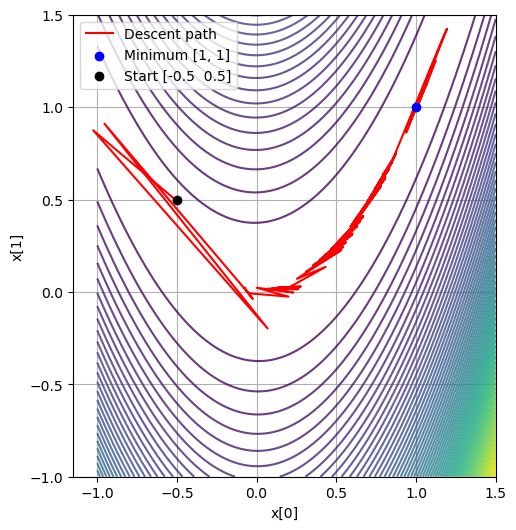

In [2]:
def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def Armicho_step(step, c_1, tau):
    f_k = f(x)
    g = nd.Gradient(f)(x)
    desc_dir_grad = p@g
    while f(x + step*p) > f_k + c_1*step*desc_dir_grad:
        step = tau*step
    return step

x = np.array([-0.5, 0.5])

res_sp = minimize(f, x)
sp_min = res_sp.fun

start = x

g = nd.Gradient(f)(x)
B = np.identity(x.shape[0])
p = -B@g
gamma = 0.0001

lim = 500

step, c_1, tau = 10, 0.000001, 0.9

history = np.array([[x[0], x[1], f(x)]])
for _ in range(lim):
    x_old = x
    g_old = g
    x = x + gamma*p
    g = nd.Gradient(f)(x)
    s = g - g_old
    y = x - x_old
    B = B + np.outer(y - B@s,y - B@s)/np.inner(y - B@s,s)
    p = -B@g
    gamma = Armicho_step(step, c_1, tau)
    history = np.append(history, [[x[0], x[1], f(x)]], axis = 0)

print('obtained f: ', f(x), 'scipy_solution: ', sp_min)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
X, Y = np.meshgrid(np.linspace(-1, 1.5, 100), np.linspace(-1, 1.5, 100))
Z = f([X, Y])
plt.contour(X, Y, Z, levels = 100, cmap = 'viridis', alpha = 0.8)
plt.plot(history[:, 0], history[:, 1], color = 'red', label = "Descent path")
plt.scatter(1, 1, color = 'blue', label = "Minimum [1, 1]", zorder = 5)
plt.scatter(-0.5, 0.5, color = 'black', label = 'Start ' + str(start), zorder = 5)

plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.legend()
plt.grid()
plt.show()